In [2]:
import utils_general
import utils_coup
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.linalg import expm
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use a LaTeX-compatible serif font
    "font.serif": ["Computer Modern Roman"],  # Or another LaTeX font
})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from numpy import genfromtxt
file_path = 'chris_data_diffusion.csv'
temp_data = genfromtxt(file_path, delimiter=',')
T_ODE = (temp_data.T)[0:3,:]
t = np.arange(len(T_ODE[0]))
F_0 = 3.7
F_ODE = utils_general.F_const(t, F_0)

In [71]:
L

array([[ 1.04218883, -3.78462656,  1.93868519],
       [ 1.00884301, -3.44916104,  1.56723144],
       [ 1.00968374, -3.48298118,  1.60686914]])

In [70]:
L = utils_general.calc_L_direct_2D(T_ODE, F_ODE, t)
T_est = utils_general.reconstruct_T_2D(F_ODE, T_ODE, L, 0, 1, None)

In [27]:
from scipy.linalg import toeplitz
G_deconv = utils_general.calc_G_deconv_2D(T_ODE, F_ODE, dt=1)
F_toeplitz = toeplitz(F_ODE, np.zeros_like(F_ODE))
T_est_deconv = (G_deconv) @ F_toeplitz.T

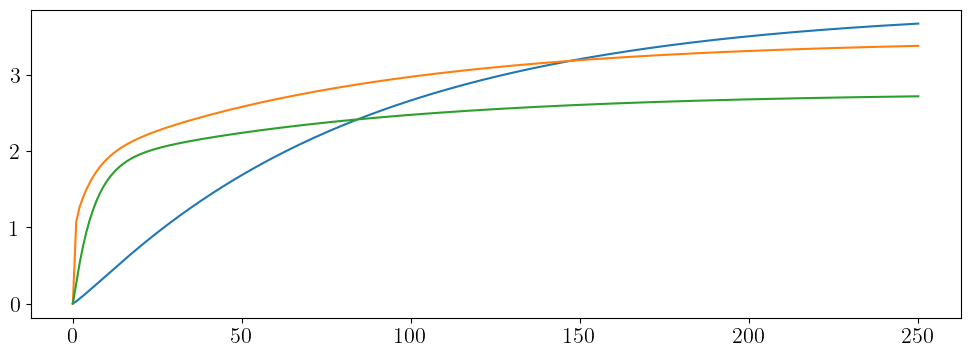

In [36]:
plt.plot(T_est_deconv.T)

In [63]:
from scipy.optimize import minimize
m, k = 2, 3
initial_v = np.random.rand(m * k)  # Flattened eigenvector
initial_lam = np.random.rand(m)      # Eigenvalues
initial_params = np.concatenate([initial_v, initial_lam])  # Combine into a single parameter vector
bounds = [(None, None)] * (m * k) + [(-1, 0)] * m

gamma = np.ones(3)

res = minimize(utils_general.opt_v_lam_2D,
                        initial_params,
                        args=(T_ODE, F_ODE, t, m, 1, gamma),
                        method='L-BFGS-B',
                        bounds=bounds)
G_fit = utils_general.apply_v_lam_2D(res.x, t, m, gamma, 1)

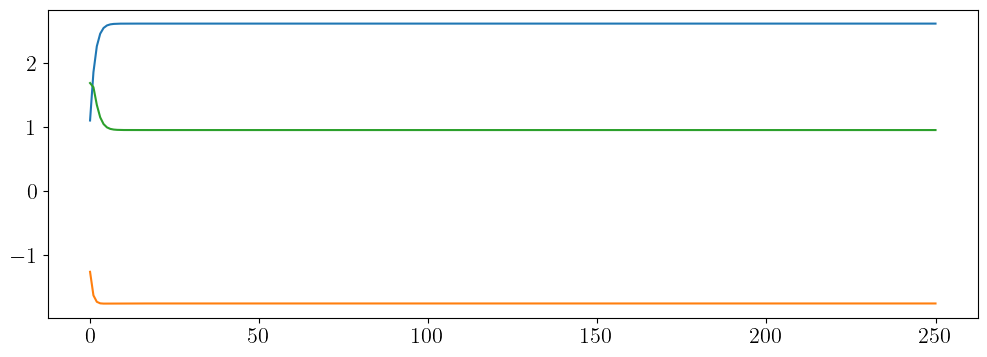

In [64]:
T_est_fit = (G_fit) @ F_toeplitz.T
plt.plot(T_est_fit.T)

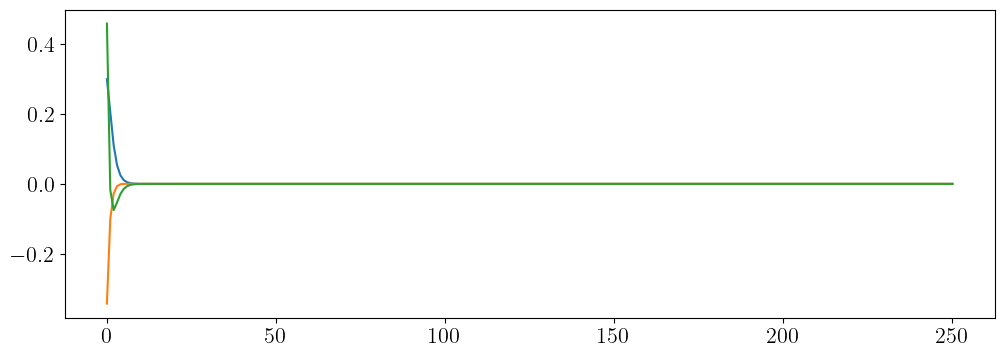

In [67]:
plt.plot(G_fit.T)
#plt.plot(G_deconv.T)